In [2]:
import tensorflow as tf
from transformers import (
    GPT2Tokenizer,
)
import seaborn as sns
from transformers.models.gpt2.tokenization_gpt2_tf import TFGPT2Tokenizer
import keras_nlp
import numpy as np

2025-03-14 17:27:50.980244: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 17:27:51.186679: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 17:27:51.377241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741984071.532398   52758 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741984071.576011   52758 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 17:27:51.950720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Model

In [2]:
tokenizer = keras_nlp.models.GPT2Tokenizer.from_preset("gpt2_base_en")


W0000 00:00:1741791367.011896    7114 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
tokenizer.detokenize(tokenizer("teste"))

'teste'

In [7]:
FILENAME = 'model.tflite'

In [ ]:
interpreter = tf.lite.Interpreter(model_path=FILENAME)

In [8]:
tf.lite.experimental.Analyzer.analyze(model_path=FILENAME,
                                      model_content=None,
                                      gpu_compatibility=False)


=== model.tflite ===

Your TFLite model has '4' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the CALL_ONCE op takes
 as input and produces  as output.

Subgraph#0 get_weights() -> [T#278, T#197, T#223, T#236, T#277, T#288, T#152, T#232, T#293, T#290, T#185, T#271, T#221, T#203, T#201, T#156, T#220, T#219, T#176, T#205, T#169, T#216, T#270, T#171, T#164, T#259, T#159, T#151, T#250, T#284, T#148, T#175, T#189, T#286, T#273, T#215, T#243, T#212, T#225, T#207, T#186, T#162, T#184, T#240, T#242, T#263, T#188, T#229, T#268, T#198, T#166, T#196, T#187, T#262, T#167, T#153, T#227, T#213, T#154, T#149, T#269, T#281, T#238, T#173, T#199, T#295, T#279, T#224, T#217, T#287, T#181, T#182, T#157, T#193, T#241, T#204, T#200, T#292, T#165, T#253, T#190, T#163, T#291, T#202, T#283, T#174, T#183, T#275, T#246, T#195, T#294, T#155, T#160, T#254, T#180, T#177, T#211, T#261, T#252, T#256, T#282, T#280, T#210, T#161, T#192, T#234, T#235, T#247

In [ ]:
interpreter.allocate_tensors()

In [ ]:
infer = interpreter.get_signature_runner('infer')
train = interpreter.get_signature_runner('train')

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("openai-community/gpt2")

In [ ]:
tkn1 = tokenizer("My name is very", return_tensors="tf")

In [ ]:
tf_string = tf.convert_to_tensor(["My name is very"]).numpy()
tf_string

In [ ]:
input_ids = tkn1['input_ids'].numpy().flatten()

In [ ]:
input_ids

In [ ]:
def model_input_train(string):
    inputs = []
    labels = []
    size = 8
    last_tokens = input_ids if input_ids.shape[0] < size else input_ids[-size:]
    input_ids
    for i in range(1, last_tokens.shape[0]):
        inp = np.zeros(8, dtype=np.int32)
        label = np.zeros(8, dtype=np.int32)
        for j in range(8):
            if j >= i:
                break
            inp[i-j-1] = last_tokens[i-j-1]
            label[i-j-1] = last_tokens[i-j-1]
            label[i-j] = last_tokens[i-j]
                
        inputs.append(inp)
        labels.append(label)
        
    inputs = tf.convert_to_tensor(inputs)
    labels = tf.convert_to_tensor(labels)
    mask = np.full_like(inputs, fill_value=0, dtype=np.int32)
    for i, sample in enumerate(inputs):
        for j, v in enumerate(sample):
            if v != 0:
                mask[i][j] = 1
    mask = tf.convert_to_tensor(mask)
    return inputs, mask, labels

In [ ]:
inputs = tf.convert_to_tensor(inputs)
inputs

In [ ]:
labels = tf.convert_to_tensor(labels)
labels

In [ ]:
mask = np.full_like(inputs, fill_value=0, dtype=np.int32)

In [ ]:
mask

In [ ]:
for i, sample in enumerate(inputs):
    for j, v in enumerate(sample):
        if v != 0:
            mask[i][j] = 1

In [ ]:
mask = tf.convert_to_tensor(mask)
mask

In [ ]:
print(f"Inputs shape: {inputs.shape}")
print(f"Mask shape: {mask.shape}")
print(f"labels shape: {labels.shape}")

In [ ]:
train(input_ids= inputs, attention_mask = mask, labels=inputs)

# Lora model

In [23]:
FILENAME = 'lora_model.tflite'

In [24]:
interpreter = tf.lite.Interpreter(model_path=FILENAME, experimental_op_resolver_type=tf.lite.experimental.OpResolverType.BUILTIN)

W0000 00:00:1741792275.565979    7114 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [25]:
interpreter.allocate_tensors()

In [26]:
infer = interpreter.get_signature_runner('infer')
train = interpreter.get_signature_runner('train')
get_w = interpreter.get_signature_runner('get_weights')

In [27]:
tokenizer = GPT2Tokenizer.from_pretrained("openai-community/gpt2")


In [28]:
tokens = tokenizer("My name is Rafael", return_tensors='tf')
tokens

{'input_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[ 3666,  1438,   318, 31918]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 1, 1, 1]], dtype=int32)>}

In [29]:
old_w = get_w()
old_w.keys()

dict_keys(['lora_qa_0:0', 'lora_qa_10:0', 'lora_qa_11:0', 'lora_qa_1:0', 'lora_qa_2:0', 'lora_qa_3:0', 'lora_qa_4:0', 'lora_qa_5:0', 'lora_qa_6:0', 'lora_qa_7:0', 'lora_qa_8:0', 'lora_qa_9:0', 'lora_qb_0:0', 'lora_qb_10:0', 'lora_qb_11:0', 'lora_qb_1:0', 'lora_qb_2:0', 'lora_qb_3:0', 'lora_qb_4:0', 'lora_qb_5:0', 'lora_qb_6:0', 'lora_qb_7:0', 'lora_qb_8:0', 'lora_qb_9:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/bias:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/weight:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_proj/bias:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_proj/weight:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_1/beta:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_1/gamma:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_2/beta:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_2/gamma:0', 'tfgpt2lm_head_model/transformer/h_._0/mlp/c_fc/bias:0', 'tfgpt2lm_head_model/transformer/h_._0/mlp/c_fc/weight:0', 'tfgpt2lm_head_model/transformer/h_._0/mlp/c_proj/b

In [30]:
old_w["tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/weight:0"]

array([[-0.4738484 , -0.26136586, -0.09780374, ...,  0.05132535,
        -0.0584389 ,  0.02499568],
       [ 0.08742206,  0.1473427 ,  0.23870145, ..., -0.05253514,
        -0.01125987, -0.01558759],
       [ 0.00388936,  0.06946629,  0.3668052 , ...,  0.11428114,
         0.03629516, -0.03184864],
       ...,
       [-0.25919554, -0.01636625,  0.19914557, ...,  0.00953369,
        -0.05159837,  0.03186192],
       [ 0.15165617,  0.2170211 ,  0.10434178, ...,  0.02933884,
        -0.04287174, -0.04746685],
       [-0.41001597, -0.19235404, -0.2400296 , ..., -0.00459218,
         0.00697855,  0.01984419]], dtype=float32)

In [31]:
old_w.keys()

dict_keys(['lora_qa_0:0', 'lora_qa_10:0', 'lora_qa_11:0', 'lora_qa_1:0', 'lora_qa_2:0', 'lora_qa_3:0', 'lora_qa_4:0', 'lora_qa_5:0', 'lora_qa_6:0', 'lora_qa_7:0', 'lora_qa_8:0', 'lora_qa_9:0', 'lora_qb_0:0', 'lora_qb_10:0', 'lora_qb_11:0', 'lora_qb_1:0', 'lora_qb_2:0', 'lora_qb_3:0', 'lora_qb_4:0', 'lora_qb_5:0', 'lora_qb_6:0', 'lora_qb_7:0', 'lora_qb_8:0', 'lora_qb_9:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/bias:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/weight:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_proj/bias:0', 'tfgpt2lm_head_model/transformer/h_._0/attn/c_proj/weight:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_1/beta:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_1/gamma:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_2/beta:0', 'tfgpt2lm_head_model/transformer/h_._0/ln_2/gamma:0', 'tfgpt2lm_head_model/transformer/h_._0/mlp/c_fc/bias:0', 'tfgpt2lm_head_model/transformer/h_._0/mlp/c_fc/weight:0', 'tfgpt2lm_head_model/transformer/h_._0/mlp/c_proj/b

In [32]:
old_w["lora_qa_0:0"]

array([[-0.07264199,  0.03499894,  0.08084951, ...,  0.03579102,
        -0.05422665, -0.08397236],
       [-0.04165912,  0.00879396, -0.04339315, ..., -0.06146335,
        -0.08646293, -0.01157164],
       [ 0.03221232,  0.03696629, -0.04021468, ...,  0.07533439,
        -0.0169674 , -0.05139892],
       ...,
       [ 0.03213202, -0.00276101, -0.02284906, ..., -0.0659715 ,
         0.06510368, -0.08136769],
       [ 0.03128096,  0.04121742, -0.05721896, ...,  0.02902349,
         0.08672681, -0.03221045],
       [ 0.04533258,  0.05205566, -0.00137427, ...,  0.01717688,
         0.00966611, -0.08058951]], dtype=float32)

In [33]:
def model_input_train(string):
    tokens = tokenizer(string)
    input_ids = tokens['input_ids']
    inputs = []
    labels = []
    size = 8
    last_tokens = input_ids if len(input_ids) < size else input_ids[-size:]
    for i in range(1, len(last_tokens)):
        inp = np.zeros(8, dtype=np.int32)
        label = np.zeros(8, dtype=np.int32)
        for j in range(8):
            if j >= i:
                break
            inp[i-j-1] = last_tokens[i-j-1]
            label[i-j-1] = last_tokens[i-j-1]
            label[i-j] = last_tokens[i-j]
                
        inputs.append(inp)
        labels.append(label)
        
    inputs = tf.convert_to_tensor(inputs)
    labels = tf.convert_to_tensor(labels)
    mask = np.full_like(inputs, fill_value=0, dtype=np.int32)
    for i, sample in enumerate(inputs):
        for j, v in enumerate(sample):
            if v != 0:
                mask[i][j] = 1
    mask = tf.convert_to_tensor(mask)
    return inputs, mask, labels

In [34]:
inputs, mask, labels = model_input_train("My name is Rafael")

In [35]:
inputs

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[3666,    0,    0,    0,    0,    0,    0,    0],
       [3666, 1438,    0,    0,    0,    0,    0,    0],
       [3666, 1438,  318,    0,    0,    0,    0,    0]], dtype=int32)>

In [36]:
mask

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0]], dtype=int32)>

In [37]:
labels

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[ 3666,  1438,     0,     0,     0,     0,     0,     0],
       [ 3666,  1438,   318,     0,     0,     0,     0,     0],
       [ 3666,  1438,   318, 31918,     0,     0,     0,     0]],
      dtype=int32)>

In [38]:
losses = []
for i in range(0, 50):
    print(f"Epoch: {i}")
    response = train(input_ids=inputs, attention_mask=mask, labels=labels)
    losses.append(response['loss'][0])

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49


In [39]:
losses

[np.float32(6.727915),
 np.float32(6.1708946),
 np.float32(5.978092),
 np.float32(5.935792),
 np.float32(5.906974),
 np.float32(5.217645),
 np.float32(5.29449),
 np.float32(5.008018),
 np.float32(4.396704),
 np.float32(4.577052),
 np.float32(3.29018),
 np.float32(3.4149413),
 np.float32(3.238162),
 np.float32(2.4650066),
 np.float32(3.0819714),
 np.float32(1.7218372),
 np.float32(1.9423314),
 np.float32(1.9954126),
 np.float32(1.6857382),
 np.float32(2.0102391),
 np.float32(1.2451661),
 np.float32(1.5987676),
 np.float32(1.3545096),
 np.float32(1.5178206),
 np.float32(1.1682451),
 np.float32(1.6189176),
 np.float32(1.1273735),
 np.float32(1.1409719),
 np.float32(0.9087897),
 np.float32(1.0260091),
 np.float32(1.4369038),
 np.float32(0.8457662),
 np.float32(0.44773108),
 np.float32(0.27734935),
 np.float32(0.38691458),
 np.float32(0.92772937),
 np.float32(0.1776264),
 np.float32(1.1088692),
 np.float32(0.9250364),
 np.float32(0.6571786),
 np.float32(0.92095727),
 np.float32(0.9136075),


In [40]:
new_w = get_w()

In [42]:
new_w["lora_qa_0:0"]

array([[-0.09108824,  0.00869605,  0.12068094, ...,  0.07261863,
        -0.07892216, -0.06075471],
       [-0.02114246,  0.02984074, -0.05631979, ..., -0.05910797,
        -0.08475971, -0.00828809],
       [ 0.02237616,  0.02232795, -0.03347693, ...,  0.07876335,
        -0.02032248, -0.0452819 ],
       ...,
       [ 0.03997394,  0.00402013, -0.01416169, ..., -0.04505557,
         0.05280148, -0.07063516],
       [ 0.0343001 ,  0.02528373, -0.02597261, ...,  0.06314406,
         0.06083027, -0.00706098],
       [ 0.01984513,  0.02419443,  0.03567569, ...,  0.05076515,
        -0.01100322, -0.06890231]], dtype=float32)

In [43]:
new_w["tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/weight:0"]

array([[-0.4738484 , -0.26136586, -0.09780374, ...,  0.05132535,
        -0.0584389 ,  0.02499568],
       [ 0.08742206,  0.1473427 ,  0.23870145, ..., -0.05253514,
        -0.01125987, -0.01558759],
       [ 0.00388936,  0.06946629,  0.3668052 , ...,  0.11428114,
         0.03629516, -0.03184864],
       ...,
       [-0.25919554, -0.01636625,  0.19914557, ...,  0.00953369,
        -0.05159837,  0.03186192],
       [ 0.15165617,  0.2170211 ,  0.10434178, ...,  0.02933884,
        -0.04287174, -0.04746685],
       [-0.41001597, -0.19235404, -0.2400296 , ..., -0.00459218,
         0.00697855,  0.01984419]], dtype=float32)

Text(0.5, 1.0, 'Training only LoRA on PC')

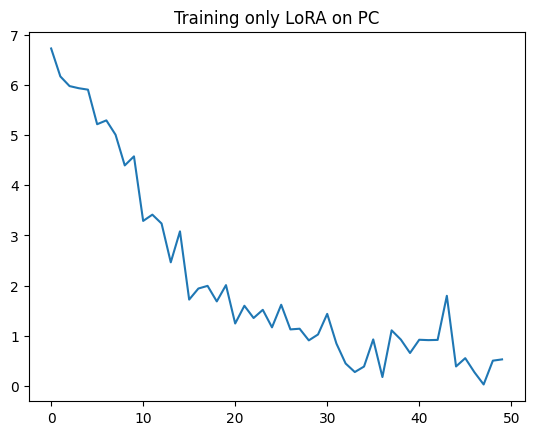

In [49]:
ax = sns.lineplot(y=losses, x=list(range(len(losses))))
ax.set_title("Training only LoRA on PC")

# INFER

In [ ]:
result = infer(input_ids=input_ids, attention_mask=attention_mask)
# q_result = q_infer(input_ids=input_ids, attention_mask=attention_mask)

In [ ]:
logits = result['logits']
# q_logits = q_result['logits']

In [ ]:
token = logits.argmax()
token

In [ ]:
# q_token = q_logits.argmax()
# q_token

In [ ]:
tokenizer.decode([token])

In [ ]:
# tokenizer.decode([q_token])

# TRAIN

In [ ]:
input_ids.shape

In [ ]:
losses = []
for i in range(0,5):
    r = train(input_ids=input_ids, attention_mask=attention_mask)
    losses.append(r['loss'])

In [ ]:
sns.lineplot(x=list(range(len(losses))), y=losses)

# Coisa do kotlin legal

In [50]:
import seaborn as sns
var = [
6.7566485,
6.340226,
6.1556816,
6.281722,
5.6088605,
5.918395,
4.902436,
4.67646,
4.146946,
4.6267576,
4.521463,
4.222249,
3.3723776,
2.7575505,
2.0576203,
1.8310685,
2.4127614,
1.1473249,
1.7485484,
1.6484213,
1.1752433,
1.7709715,
1.3514408,
1.4651423,
0.85381764,
1.293075,
1.3733848,
1.4738468,
0.40680322,
1.068149,
0.8759079,
1.059473,
0.7180114,
1.0435889,
0.89067715,
0.89358205,
1.1739465,
0.86746514,
0.9391169,
1.006605,
0.6550368,
0.69978833,
0.3260556,
0.35864395,
]

Text(0.5, 1.0, 'Training model with LoRA on-device')

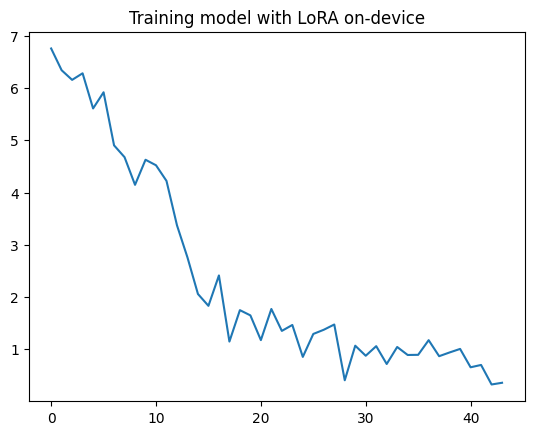

In [52]:
ax = sns.lineplot(x=list(range(len(var))), y=var)
ax.set_title("Training model with LoRA on-device")

In [ ]:
#-------------------------- MEMÓRIA --------------------------
# metodo 1
#val runtime = Runtime.getRuntime()
#val usedMemoryBefore = runtime.totalMemory() - runtime.freeMemory()
# metodo 1

# metodo 2
#val nativeBefore = Debug.getNativeHeapAllocatedSize()
# metodo 2

# metodo 3
#val activityManager = context.getSystemService(Context.ACTIVITY_SERVICE) as ActivityManager
#val info = ActivityManager.MemoryInfo()
#activityManager.getMemoryInfo(info)
#val usedRAMBefore = info.availMem / (1024*1024)
# metodo 3

# metodo 4
#val activityManager = context.getSystemService(Context.ACTIVITY_SERVICE) as ActivityManager
#val myPid = android.os.Process.myPid()
#val infoBefore = activityManager.getProcessMemoryInfo((intArrayOf(myPid)))
#val memoryBefore = infoBefore[0]
#val pssBeforeKb = memoryBefore.totalPss # Proportional Set Size -> Basicamente a memória propocial utilizada pelo processo
# metodo 4


# Função pra medir


# metodo 1
#val usedMemoryAfter = runtime.totalMemory() - runtime.freeMemory()
#val usedJVMHeap = (usedMemoryAfter - usedMemoryBefore) / (1024f*1024f)
#Log.d(TAG, "Used memory ${usedJVMHeap} Mb") # Variação de memória na heap. É métrica da JVM então é uma estimativa, não é preciso
# metodo 1

# metodo 2 -> 2Gb
#val nativeAfter = Debug.getNativeHeapAllocatedSize()
#val usedNativeHeap = (nativeAfter - nativeBefore) / (1024f*1024f)
#Log.d(TAG, "Used memory ${usedNativeHeap} Mb") # Método pra caso a função utilize funções nativas em C/C++ (O que parece nosso caso)

# metodo 3 -2Gb
#activityManager.getMemoryInfo(info)
#val usedRAMAfter = info.availMem / (1024*1024)
#val usedRAM = usedRAMAfter - usedRAMBefore
#Log.d(TAG, "Used memory ${usedRAM} Mb") # Método pra ver o uso geral do sistema, aqui vamos ter outros processos que interferem na métrica, serva pra saber se o sistema ta ficando com pouca memória
# metodo 3

# metodo 4 -> Ta sempre retornando 0
#val infoAfter = activityManager.getProcessMemoryInfo(intArrayOf(myPid))
#val memoryAfter = infoAfter[0]
#val pssAfterKb = memoryAfter.totalPss
#val diffMb = (pssAfterKb - pssBeforeKb)
#Log.d(TAG, "Used memory ${diffMb} Mb") # Esse método é mais preciso, mas ainda envolve memória compartilhada, ele pega a quantidade proporcional de memória utilizada pelo processo antes e depois da execução
# metodo 4